## For people who care about HEALTHY food

### Wow, I could not resist the smell. How could people say no to Starbucks drinks? But Hang on. Let's do some fact check first.
![Starbucks drink](https://64.media.tumblr.com/tumblr_mbpi4zkluw1rvw986o6_500.gif)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

In [2]:
#starbucks
#import data
url='Starbucks/starbucks-menu-nutrition-drinks.csv'
df=pd.read_csv(url, na_values='-')
df.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
1,Ombré Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
2,Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
3,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0


In [3]:
df.dtypes

Unnamed: 0     object
Calories      float64
Fat (g)       float64
Carb. (g)     float64
Fiber (g)     float64
Protein       float64
Sodium        float64
dtype: object

In [4]:
df.shape

(177, 7)

In [5]:
df.rename(columns={'Unnamed: 0':'drink'}, inplace=True)
df.columns

Index(['drink', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium'],
      dtype='object')

In [6]:
df.isna().sum()

drink         0
Calories     85
Fat (g)      85
Carb. (g)    85
Fiber (g)    85
Protein      85
Sodium       85
dtype: int64

In [7]:
df=df.dropna(thresh=6, axis=0)
#remove obs with all missing nutrition values

In [8]:
df.shape

(92, 7)

In [9]:
df.isna().sum()

drink        0
Calories     0
Fat (g)      0
Carb. (g)    0
Fiber (g)    0
Protein      0
Sodium       0
dtype: int64

In [10]:
#the quantile distribution of general nutritions
df_q=df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
df_q

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0.1,10.0,0.0,0.2,0.0,0.0,0.0
0.2,60.0,0.0,12.2,0.0,0.0,10.0
0.3,70.0,0.0,15.6,0.0,0.0,10.0
0.4,114.0,0.0,19.0,0.0,0.0,10.0
0.5,130.0,0.0,25.5,0.0,1.0,15.0
0.6,140.0,0.8,31.0,0.0,2.2,23.0
0.7,150.0,2.5,35.0,0.0,5.0,93.5
0.8,200.0,5.8,35.8,0.0,10.0,135.0
0.9,260.0,7.0,39.8,1.0,12.0,160.0
1.0,430.0,26.0,64.0,8.0,20.0,240.0


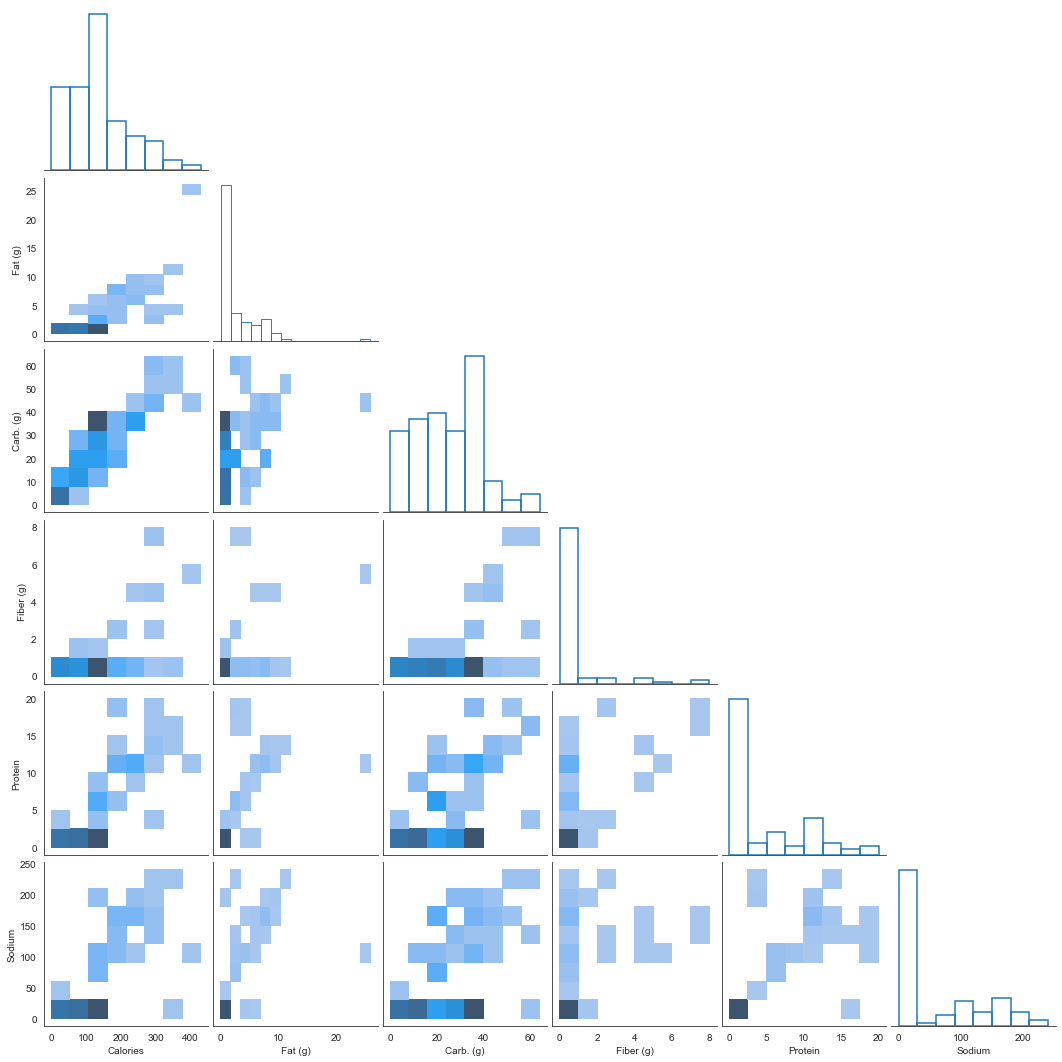

In [11]:
#correlation between these variables
sns.set_style('white')
sns.pairplot(df.drop('drink', axis=1), diag_kws=dict(fill=False), kind='hist', corner=True)

We can find the high correlation between calories and carbs in this data set. The distribution of these nutritions is not normal

<AxesSubplot:ylabel='Proportion'>

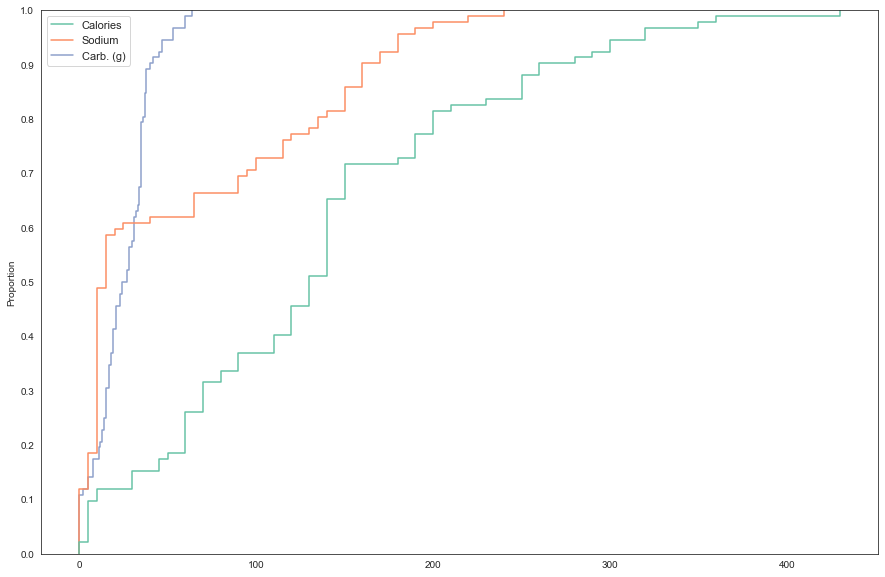

In [12]:
#The cdf distribution
fig, ax = plt.subplots(figsize=(15, 10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
cp=sns.color_palette("Set2")
sns.set_theme(context='notebook', palette=cp)
sns.set_style('whitegrid')
sns.ecdfplot(data=df[['Calories','Sodium', 'Carb. (g)']], ax=ax)

More than 60% of its drinks have calories more than 100/12oz 

<AxesSubplot:ylabel='Proportion'>

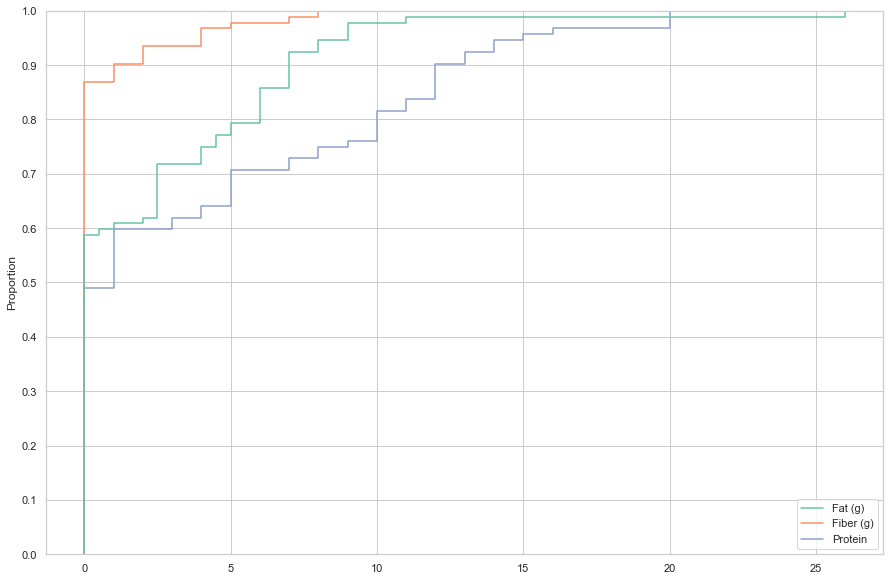

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
sns.ecdfplot(data=df[['Fat (g)', 'Fiber (g)', 'Protein']], ax=ax)

Almost half of starbucks beverage have zero fat, fiber and protein.

✔️Fact check with [CDC](https://www.cdc.gov/healthyweight/healthy_eating/drinks.html): People who often drink sugary drinks are more likely to face chronic disease, such as obesity, type 2 diabetes, heart disease, kidney diseases and non-alcoholic liver disease. I guess most of us just didn't realize how much sugar or calories are in our beverage.

![sugar](sugar.jpg)

If we compare the table above from CDC with the nutrition content in starbuck's beverage, what's your conclusion about starbucks drinks? Yes, most of them are delicious and peculiarly refreshing. But...

## For people suffering from DECIDOPHOBIA

![the complicated Starbucks drinks](https://www.pngkey.com/png/full/574-5746860_starbucks-frappuccino-cartoon.png)

### How could I decide which one to choose?

#### Let's clean up the messy before we dive in the BIG question, shall we? 
<img src=https://thumbs.gfycat.com/SimplisticDelightfulCod-max-1mb.gif width="200">

In [14]:
url2='Starbucks/starbucks_drinkMenu_expanded.csv'
df2=pd.read_csv(url2, na_values=['varies','Varies'])
df2.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75.0
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75.0
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75.0
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75.0
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75.0


In [15]:
df2.isna().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64

In [16]:
#Check which beverage has missing caffeine level
df2[pd.isna(df2['Caffeine (mg)'])]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6%,0%,10%,0.00%,NaN
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,NaN
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4%,0%,10%,6.00%,NaN
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10%,0%,20%,0.00%,NaN
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3,1.5,0.1,15,75,23,0,23,5.0,8%,0%,15%,0.00%,NaN
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,NaN


For all above drinks except 158, we can use 0 to replace the missing data. But we cannot do it for drink 158, because it is a brewed coffee. So we delete it directly 

In [17]:
df2=df2.fillna(0)
df2=df2.drop(158, axis=0)
df2.shape

(241, 18)

In [18]:
df2.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                float64
dtype: object

In [19]:
def remove(string): 
    return string.replace(" ", "") 
col_names=[remove(i) for i in df2.columns]
columns_dic=dict(zip(df2.columns, col_names))
df2=df2.rename(columns_dic, axis=1)
df2.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)',
       'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)',
       'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 'VitaminC(%DV)',
       'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)'],
      dtype='object')

In [20]:
df2_obj=df2.select_dtypes(include=['object'])
ber=df2_obj.filter(like='Beverage').columns
df2_ob=df2_obj.drop(ber, axis=1)
df2_rest=df2.drop(df2_ob.columns, axis=1)
df2_ob.columns

Index(['TotalFat(g)', 'VitaminA(%DV)', 'VitaminC(%DV)', 'Calcium(%DV)',
       'Iron(%DV)'],
      dtype='object')

In [21]:
df2_rest.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)', 'TotalCarbohydrates(g)',
       'Cholesterol(mg)', 'DietaryFibre(g)', 'Sugars(g)', 'Protein(g)',
       'Caffeine(mg)'],
      dtype='object')

In [22]:
#Then we need replace "3 2" at position 236 into "32"
df2_ob['TotalFat(g)']=df2_ob['TotalFat(g)'].replace('3 2', '32')
# Convert object data into numerical
df2_ob=df2_ob.applymap(lambda x: np.float(str(x).replace('%', '')))
df2_new=pd.concat([df2_rest, df2_ob], axis=1)
df2_new.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)', 'TotalCarbohydrates(g)',
       'Cholesterol(mg)', 'DietaryFibre(g)', 'Sugars(g)', 'Protein(g)',
       'Caffeine(mg)', 'TotalFat(g)', 'VitaminA(%DV)', 'VitaminC(%DV)',
       'Calcium(%DV)', 'Iron(%DV)'],
      dtype='object')

In [23]:
df2_new.dtypes

Beverage_category         object
Beverage                  object
Beverage_prep             object
Calories                   int64
TransFat(g)              float64
SaturatedFat(g)          float64
Sodium(mg)                 int64
TotalCarbohydrates(g)      int64
Cholesterol(mg)            int64
DietaryFibre(g)            int64
Sugars(g)                  int64
Protein(g)               float64
Caffeine(mg)             float64
TotalFat(g)              float64
VitaminA(%DV)            float64
VitaminC(%DV)            float64
Calcium(%DV)             float64
Iron(%DV)                float64
dtype: object

### Suggestions about how to order a drink at Starbucks 
<img src=https://i.pinimg.com/originals/fb/fd/04/fbfd042edca5a485a3a29357f9c78b33.png width="200">

In [24]:
# How to order drinks based on caffeine at Starbucks?
df2_new[['Caffeine(mg)']].describe()

,Caffeine(mg)
count,241.000000
mean,81.348548
std,66.881011
min,0.000000
25%,15.000000
50%,75.000000
75%,130.000000
max,410.000000


✔️Fact check from FDA: For healthy adults, the [FDA](https://www.fda.gov/consumers/consumer-updates/spilling-beans-how-much-caffeine-too-much#:~:text=For%20healthy%20adults%2C%20the%20FDA,it%20(break%20it%20down)) has cited 400 milligrams a day—that's about four or five cups of coffee—as an amount not generally associated with dangerous, negative effects.

In [25]:
bins=[0, 10, 50, 100, 200, 300, 410]
labels=['0-10mg', '10-50mg', '50-100mg', '100-200mg', '200-300mg', '300-410mg']
ca_starbucks=pd.cut(df2_new['Caffeine(mg)'], bins=bins, labels=labels, right = True).to_frame()

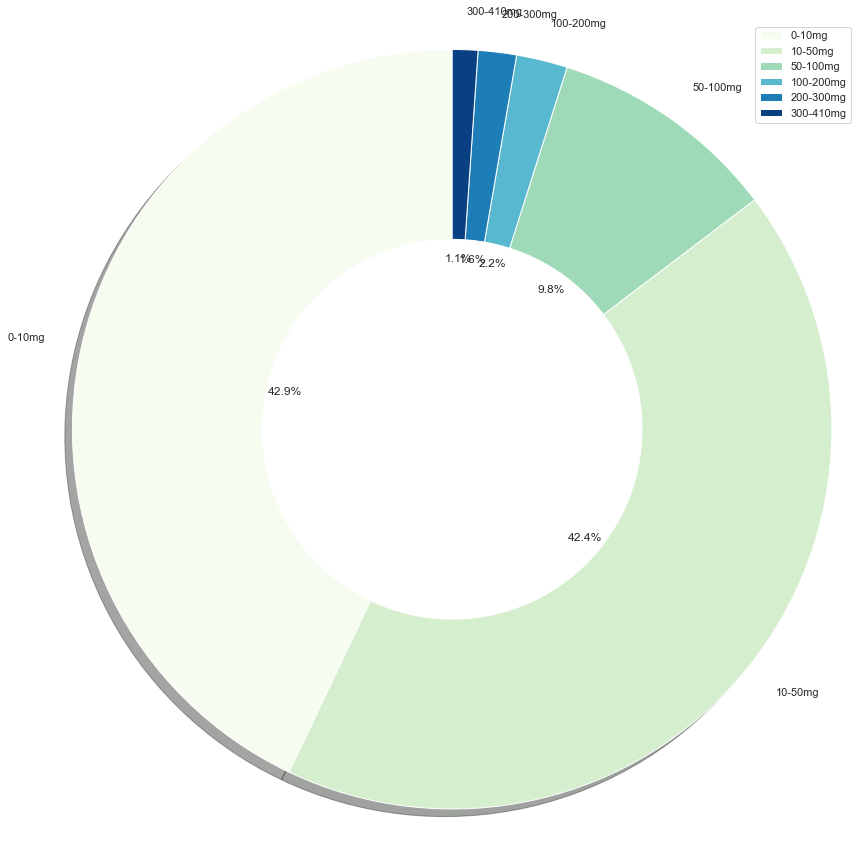

In [26]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
ca=ca_starbucks.value_counts()
fig1, ax1 = plt.subplots(figsize=(12,12))
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0., 1., len(labels)))
ax1.pie(ca, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.45, labeldistance=1.1, colors=colors)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.rcParams.update({'font.size':10})
plt.legend()
plt.show()

In [27]:
df2_new[df2_new['Caffeine(mg)'] > 300]
# Please keep social distance with these two Starbucks beverage, if you are sensitive to caffeine.

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
2,Coffee,Brewed Coffee,Grande,5,0.0,0.0,0,10,0,0,0,1.0,330.0,0.1,0.0,0.0,0.0,0.0
3,Coffee,Brewed Coffee,Venti,5,0.0,0.0,0,10,0,0,0,1.0,410.0,0.1,0.0,0.0,2.0,0.0


In [28]:
# How about sugar?
df2_new['Sugars(g)'].describe()

count    241.000000
mean      33.024896
std       19.747558
min        0.000000
25%       18.000000
50%       32.000000
75%       44.000000
max       84.000000
Name: Sugars(g), dtype: float64

✔️Fact check from [Scientists](https://www.hsph.harvard.edu/nutritionsource/carbohydrates/added-sugar-in-the-diet/): The average American consumes 22 teaspoons of added sugar a day, which amounts to 88 gram of sugar. The American Heart Association suggests an added-sugar limit of no more than 24 grams per day for most women and no more than 36 grams per day for most men.

In [29]:
bins=[0, 10, 20, 30, 40, 60, 90]
labels=['0-10g', '10-20g', '20-30g', '30-40g', '40-60g', '60-90g']
su_starbucks=pd.cut(df2_new['Sugars(g)'], bins=bins, labels=labels, right = True).to_frame()

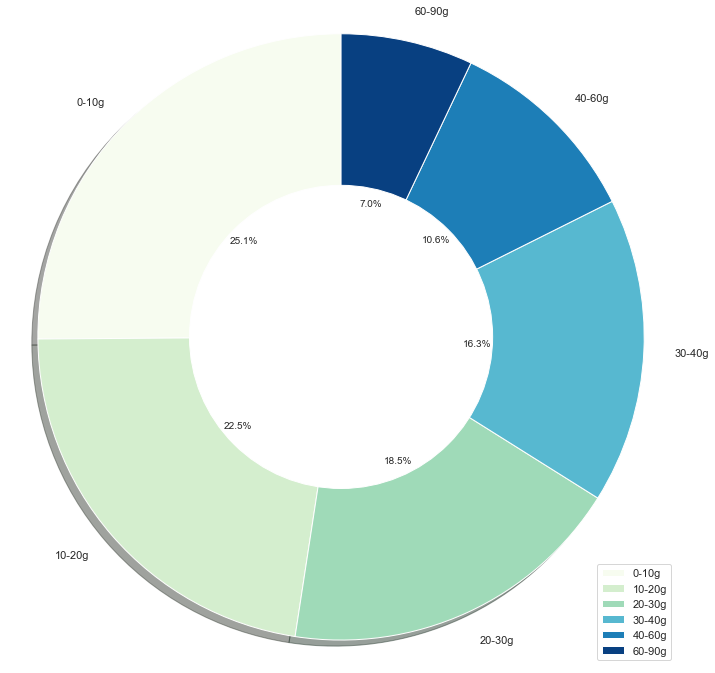

In [30]:
su=su_starbucks.value_counts()
fig1, ax1 = plt.subplots(figsize=(12,12))
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0., 1., len(labels)))
ax1.pie(su, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors,  pctdistance=0.45, labeldistance=1.1)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams.update({'font.size':15})
plt.legend()
plt.show()

In [31]:
#Let's find out which beverage is too sweet for us
sweetie=df2_new[df2_new['Sugars(g)'] > 40]
sweetie.Beverage_category.value_counts()
#Please keep a safe distance from them if you are suffering from diabetes, abesity, or heart disease.

Frappuccino® Blended Coffee          29
Signature Espresso Drinks            17
Tazo® Tea Drinks                     12
Frappuccino® Blended Crème            7
Classic Espresso Drinks               4
Frappuccino® Light Blended Coffee     3
Smoothies                             2
Shaken Iced Beverages                 1
Name: Beverage_category, dtype: int64

In [32]:
#How about trans fat?
df2_new[['TransFat(g)']].describe()

,TransFat(g)
count,241.000000
mean,1.310373
std,1.642843
min,0.000000
25%,0.100000
50%,0.500000
75%,2.000000
max,9.000000


✔️Fact check from [FDA](https://www.fda.gov/food/food-additives-petitions/trans-fat): Trans fats intake can raise the level of bad cholesterol (LDL) in the blood. Then it can cause cholesterol to build up in the blood vessels and induce cardivascular diseases. THerefore, FDA has taken actions to remove them in food market since 2015. 

In [33]:
bins=[0, 0.1, 0.5, 1, 5, 10]
labels=['0-0.1g', '0.1-0.5g', '0.5-1g', '1-5g', '5-10g']
tr_starbucks=pd.cut(df2_new['TransFat(g)'], bins=bins, labels=labels, right = True).to_frame()

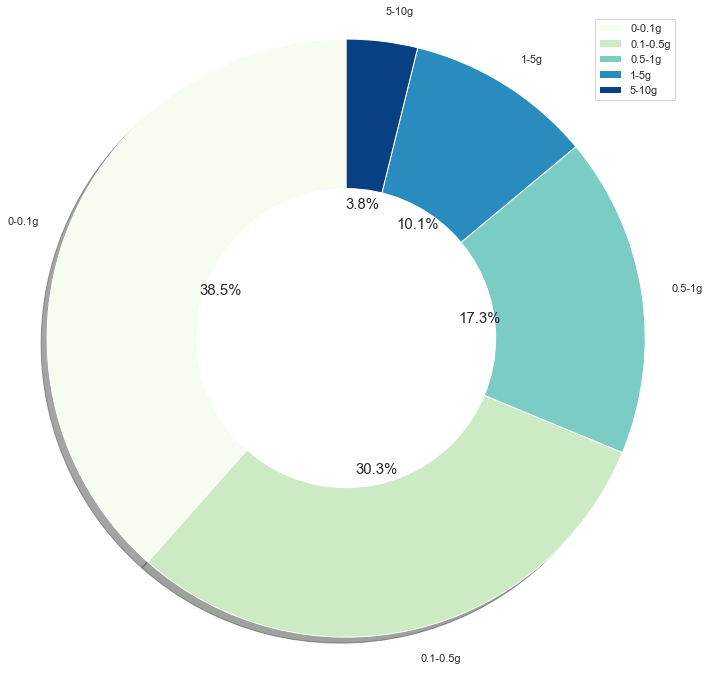

In [34]:
tr=tr_starbucks.value_counts()
fig1, ax1 = plt.subplots(figsize=(12,12))
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0., 1., len(labels)))
ax1.pie(tr, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors,  pctdistance=0.45, labeldistance=1.1)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams.update({'font.size':15})
plt.legend()
plt.show()

In [35]:
TransFat_0=df2_new[df2_new['TransFat(g)']==0]
TransFat_0.Beverage_category.value_counts()

Shaken Iced Beverages                11
Classic Espresso Drinks               6
Tazo® Tea Drinks                      4
Coffee                                4
Signature Espresso Drinks             4
Frappuccino® Blended Coffee           2
Frappuccino® Light Blended Coffee     2
Name: Beverage_category, dtype: int64

In [36]:
TransFat_h=df2_new[df2_new['TransFat(g)']>5]
TransFat_h.Beverage_category.value_counts()

Signature Espresso Drinks      6
Classic Espresso Drinks        1
Frappuccino® Blended Coffee    1
Name: Beverage_category, dtype: int64

In [37]:
# How about Saturated fat?
df2_new[['SaturatedFat(g)']].describe()

,SaturatedFat(g)
count,241.000000
mean,0.037759
std,0.071484
min,0.000000
25%,0.000000
50%,0.000000
75%,0.100000
max,0.300000


In [38]:
saturated_fat=df2_new[['SaturatedFat(g)']]
saturated_fat.value_counts()

SaturatedFat(g)
0.0                179
0.1                 37
0.2                 21
0.3                  4
dtype: int64


### Please keep proper social distance with them
<img src=https://i.pinimg.com/474x/c7/b5/33/c7b533f5eecf070470d279b293f4acab.jpg width="150">

In [39]:
df2_new[df2_new['Sugars(g)'] > 40]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
25,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Venti Nonfat Milk,280,2.0,0.0,10,160,54,2,44,17.0,180.0,3.0,25.0,0.0,45.0,30.0
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,6.0,0.2,30,180,53,2,43,17.0,180.0,11.0,20.0,2.0,45.0,30.0
37,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Venti Nonfat Milk,250,0.2,0.0,10,180,47,0,45,15.0,150.0,0.3,25.0,0.0,50.0,0.0
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,4.5,0.3,35,200,46,0,44,15.0,150.0,9.0,25.0,2.0,45.0,0.0
71,Signature Espresso Drinks,Caramel Macchiato,Venti Nonfat Milk,240,1.0,0.0,10,170,43,0,41,13.0,150.0,1.0,25.0,0.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,240,0.2,0.0,0,180,51,1,49,3.0,0.0,2.0,4.0,6.0,15.0,8.0
235,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Venti Nonfat Milk,310,0.1,0.0,5,260,70,0,69,6.0,0.0,0.2,10.0,8.0,20.0,4.0
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,350,3.0,0.2,15,260,70,0,68,6.0,0.0,6.0,8.0,8.0,20.0,4.0
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,0.4,0.0,0,250,67,1,64,5.0,0.0,32.0,6.0,8.0,20.0,10.0


In [40]:
df2_new[df2_new['TransFat(g)']>5]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,6.0,0.2,30,180,53,2,43,17.0,180.0,11.0,20.0,2.0,45.0,30.0
78,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,310,6.0,0.1,20,200,46,0,44,11.0,75.0,9.0,15.0,2.0,35.0,0.0
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,7.0,0.2,25,250,61,0,58,15.0,150.0,11.0,15.0,2.0,45.0,0.0
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,6.0,0.0,10,310,78,0,74,19.0,150.0,7.0,25.0,2.0,60.0,2.0
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,9.0,0.2,35,330,77,0,74,19.0,150.0,15.0,20.0,4.0,60.0,2.0
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,6.0,0.0,5,290,70,1,64,16.0,150.0,13.0,15.0,2.0,60.0,20.0
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,6.0,0.3,35,200,63,2,54,17.0,30.0,11.0,25.0,2.0,50.0,30.0
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,7.0,0.2,15,340,90,2,84,7.0,145.0,10.0,6.0,0.0,15.0,35.0


In [41]:
df2_new[df2_new['Caffeine(mg)'] > 300]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
2,Coffee,Brewed Coffee,Grande,5,0.0,0.0,0,10,0,0,0,1.0,330.0,0.1,0.0,0.0,0.0,0.0
3,Coffee,Brewed Coffee,Venti,5,0.0,0.0,0,10,0,0,0,1.0,410.0,0.1,0.0,0.0,2.0,0.0


In [42]:
df2_new[(df2_new['Sugars(g)'] > 40) & df2_new['TransFat(g)']>5]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)


In [43]:
df2_new[(df2_new['Sugars(g)'] > 40) & (df2_new['Caffeine(mg)'] > 300)]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)


In [44]:
df2_new[(df2_new['Caffeine(mg)'] > 300)& (df2_new['TransFat(g)']>5)]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)


Fortunately, we don't find the beverage with all high concentration of caffeine, sugar and trans fat.

### Which beverage is the most healthy choice for us?
<img src=https://webstockreview.net/images/smiley-face-clip-art-heart-1.png width="150">

In [45]:
df2_new[(df2_new['Sugars(g)']==0) & (df2_new['Caffeine(mg)'] == 0) & (df2_new['TransFat(g)']==0)]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Well, it is time to know our new friend, TEA.
<img src=http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/teacup-without-handle.png width="150">

### Can we order beverage based on their category at Starbucks?


In [46]:
#PCA analysis for better data visualization
df2_new_pca=df2_new.iloc[:, 3:]
df2_new_pca.columns

Index(['Calories', 'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)',
       'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)',
       'Sugars(g)', 'Protein(g)', 'Caffeine(mg)', 'TotalFat(g)',
       'VitaminA(%DV)', 'VitaminC(%DV)', 'Calcium(%DV)', 'Iron(%DV)'],
      dtype='object')

<AxesSubplot:>

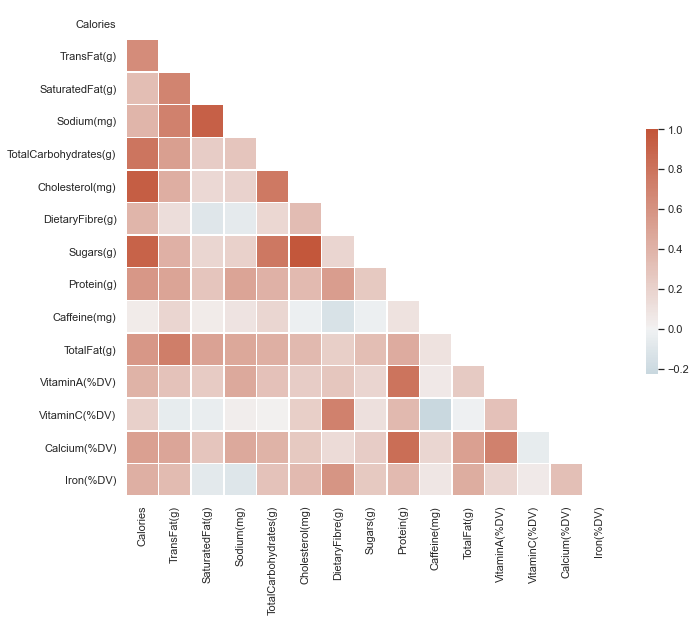

In [47]:
corr=df2_new_pca.corr().round(3)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
#center is the value at which to center the colormap when plotting divergant data. 

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
st_scaler=StandardScaler()
X=st_scaler.fit_transform(df2_new_pca)
pca = PCA(n_components =2)
pca.fit(X)
X_reduced = pca.transform(X)
X_reduced = pd.DataFrame(X_reduced, columns=['pc1', 'pc2'])
pca.explained_variance_ratio_.round(3)

array([0.411, 0.161])

These two pcs can explain ~70% variance in the original data.

In [49]:
PCA_df2=pd.concat([df2_new.iloc[:, :2], X_reduced, df2_new['Sugars(g)']], axis=1)
PCA_df2.Beverage_category.value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                17
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

Text(0.5, 1.0, 'Sugar concentatrations in Starbucks beverage with PC1 and PC2')

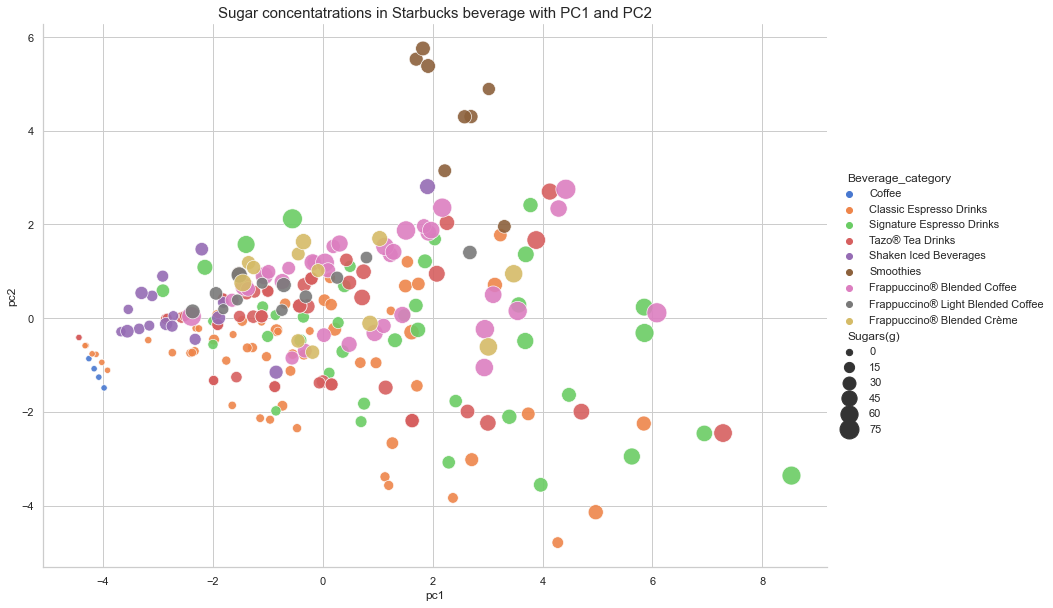

In [50]:
#Data visualization using pc1 and pc2
sns.relplot(x="pc1", y="pc2", hue="Beverage_category", alpha=.9, palette="muted", size="Sugars(g)",sizes=(40, 400), height=8.27, aspect=11.7/8.27, data=PCA_df2)
plt.title('Sugar concentatrations in Starbucks beverage with PC1 and PC2', fontsize=15)

Text(0.5, 1.0, 'Trans fat concentatrations in Starbucks beverage with PC1 and PC2')

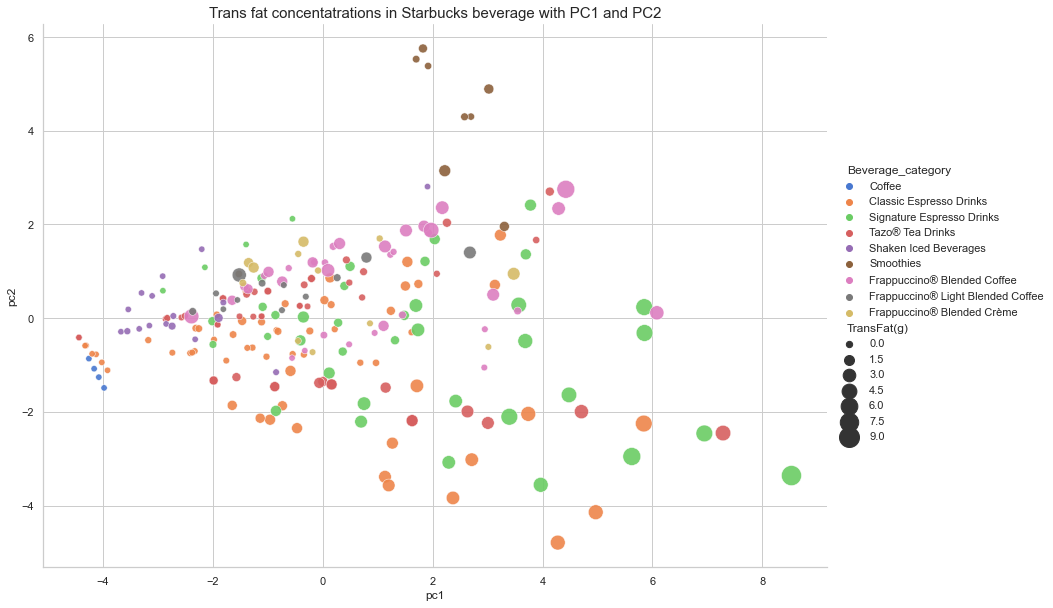

In [51]:
PCA_df2=pd.concat([df2_new.iloc[:, :2], X_reduced, df2_new['TransFat(g)']], axis=1)
sns.relplot(x="pc1", y="pc2", hue="Beverage_category", alpha=.9, palette="muted", size="TransFat(g)",sizes=(40, 400), height=8.27, aspect=11.7/8.27, data=PCA_df2)
plt.title('Trans fat concentatrations in Starbucks beverage with PC1 and PC2', fontsize=15)

Text(0.5, 1.0, 'Caffeine concentatrations in Starbucks beverage with PC1 and PC2')

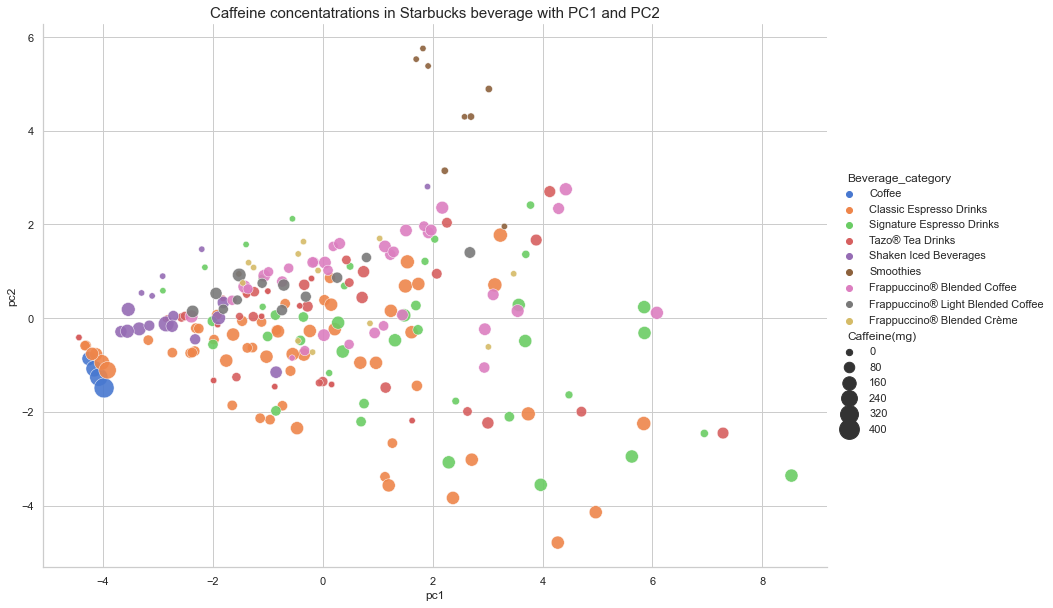

In [52]:
PCA_df2=pd.concat([df2_new.iloc[:, :2], X_reduced, df2_new['Caffeine(mg)']], axis=1)
sns.relplot(x="pc1", y="pc2", hue="Beverage_category", alpha=.9, palette="muted", size="Caffeine(mg)",sizes=(40, 400), height=8.27, aspect=11.7/8.27, data=PCA_df2)
plt.title('Caffeine concentatrations in Starbucks beverage with PC1 and PC2', fontsize=15)

#### Sadly, we can not make the proper decision only based on the beverage category.  We can try decision tree to help people make better decisions later.
<img src=https://vortexpt.com/wp-content/uploads/2012/09/dizzy-emoji-cm.jpg width="200">
